In [4]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.special import legendre
from mpmath import coulombf, coulombg, mp
from scipy.interpolate import interp1d
import csv


In [ ]:
def rutheford_diff_cross_section_lab(z1, z2, m1, m2, en_lab, theta_lab):
    """
    Calculates the differential cross section for Rutherford scattering.
    Formula 2.22 in Chu Backscattering Spectrometry

    Args:
    z1 (int): atomic number of the incident particle
    z2 (int): atomic number of the target particle
    m1 (float): mass of the incident particle (units: arbitrary, but must be consistent with m2)
    m2 (float): mass of the target particle (units: arbitrary, but must be consistent with m1)
    en_lab (float): kinetic energy of the incident particle in MeV in lab frame
    theta_lab (float): scattering angle of the incident particle in degrees in lab frame
    
    Returns:
    float: differential cross section in units of cm^2/sr
    """

    # Define the electric charge squared constant in MeV cm
    electric_charge_sq = 1.4398*10**-13 #MeV cm

    # Convert the scattering angle from degrees to radians
    theta_lab = np.radians(theta_lab)

    # Calculate the first factor in the equation using the input parameters
    first_factor = ((z1*z2*electric_charge_sq)/(4*en_lab))**2

    # Calculate the second factor in the equation using the input parameter
    second_factor = 4/(np.sin(theta_lab)**4)

    # Calculate the third factor's numerator in the equation using the input parameters
    third_factor_numerator = ((1-((m1/m2)*np.sin(theta_lab))**2)**(1/2)+np.cos(theta_lab))**2

    # Calculate the third factor's denominator in the equation using the input parameters
    third_factor_denominator =(1-((m1/m2)*np.sin(theta_lab))**2)**(1/2)

    # Calculate the differential cross section using the first, second, and third factors
    return first_factor*second_factor*third_factor_numerator/third_factor_denominator

def gamma_calc(m1, m2, m3, m4, en1, Q):
    """
    Calculates the gamma value for a given nuclear reaction based on the input parameters.
    Uses notation from "The Atomic Nucleus", Chapter 12: Conservation Laws for Nuclear Reactions, problem 17

    Args:
        m1 (float): Mass of particle 1.
        m2 (float): Mass of particle 2.
        m3 (float): Mass of particle 3.
        m4 (float): Mass of particle 4.
        en1 (float): Energy of particle 1.
        Q (float): Q-value of the reaction.

    Returns:
        float: The gamma value of the reaction.
    """
    # Calculate gamma value using the input parameters.
    return np.sqrt(m1*m3/(m2*m4)*en1/(en1+Q*(1+m1/m2)))

def theta_CtoL(theta_C_deg, gamma):
    """
    Convert CM angle(s) theta_C (deg) to lab angle(s) theta_L(deg) using the gamma value.

    Args:
    - theta_C (float or array): The angle(s) in degrees in the original coordinate system.
    - gamma (float): The gamma value used in the conversion.

    Returns:
    - theta_L (float or array): The corresponding angle(s) in degrees in the new coordinate system.
    """
    # Convert to array
    theta_C_deg = np.asarray(theta_C_deg, dtype=float)
    gamma = np.asarray(gamma, dtype=float)
    
    # Convert to radians
    theta_C = np.radians(theta_C_deg)
    
    # Calculate each part of fraction
    num = np.sin(theta_C)
    den = gamma + np.cos(theta_C) 

    # Now take arctan
    theta_L_deg = np.degrees(np.arctan2(num, den)) # [-180, 180]

    # Map to [0, 180] for scattering angles
    theta_L_deg = np.where(theta_L_deg<0, theta_L_deg + 180, theta_L_deg)

    # Check if the angle is 0 or 180 degrees in the original coordinate system or close.
    # If so, set the corresponding angle in the new coordinate system to 0 or 180 degrees.
    # a_tol = 1e-10
    # at_0 =np.isclose((theta_C_deg % 360.0),   0.0, atol=a_tol) | np.isclose((theta_C_deg % 360.0), 360.0, atol=a_tol)
    # at_180 = np.isclose((theta_C_deg % 360.0), 180.0, atol=a_tol)
    
    # theta_L_deg = np.where(at_0, 0.0, theta_L_deg)
    # theta_L_deg = np.where(at_180, 180.0, theta_L_deg)

    return theta_L_deg

def theta_LtoC(theta_L_deg, gamma):
    """
    Lab -> CM for elastic scattering, selecting the correct branch by forward-checking.
    Returns theta_C in degrees in [0, 180].
    """
    theta_L_deg = np.atleast_1d(theta_L_deg, dtype=float)
    gamma = np.atleast_1d(gamma, dtype=float)
    theta_C_deg = np.zeros_like(theta_L_deg)

    for i, thL in enumerate(theta_L_deg):
        # handle endpoints explicitly
        if np.isclose(thL, 0.0):
            theta_C_deg
        elif np.isclose(thL, np.pi):
            return 180.0
        

    return np.where(pick1, thC1_deg, thC2_deg)

In [13]:
u_to_MeV = 931.494 # 1 u in MeV/c^2
mp=1.00727646 * u_to_MeV # mass of proton
mB11=11.0093052 * u_to_MeV # mass of B11

zp = 1 # atomic number for H
zB = 5 # atomic number for B

en_lab = 0.675 # MeV energy of proton

theta_lab = 37.5 # from Becker 1987

# Projectile: Particle 1 H

# Target atom: Particle 2 B11

cm2_to_barns = 10**24

diff_Rcs_Becker1987 = rutheford_diff_cross_section_lab(zp, zB, mp, mB11, en_lab, theta_lab)*cm2_to_barns

Text(0, 0.5, 'theta_L')

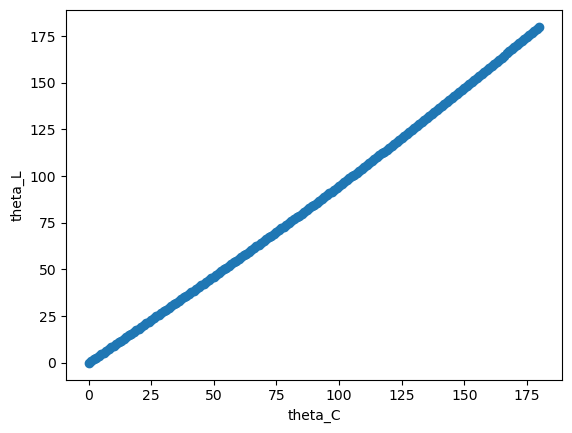

In [38]:
theta_C_array1 = np.arange(0,181,1)
gamma = mp/mB11

theta_L_array1 = theta_CtoL(theta_C_array1, gamma)

plt.scatter(theta_C_array1, theta_L_array1)
plt.xlabel('theta_C')
plt.ylabel('theta_L')

Text(0, 0.5, 'theta_C')

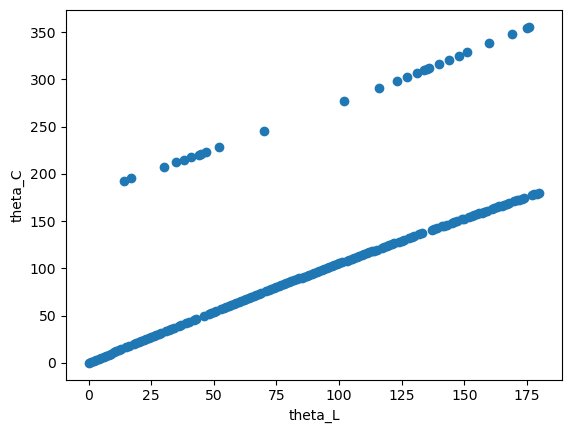

In [39]:
theta_L_array2 = np.arange(0,181,1)
gamma = mp/mB11

theta_C_array2 = theta_LtoC(theta_L_array2, gamma)

plt.scatter(theta_L_array2,theta_C_array2)
plt.xlabel('theta_L')
plt.ylabel('theta_C')

In [14]:
ratio_Becker1987 = 1.373 # Becker Ratio # 37.5 deg

# Calculate differential cross section from Becker 1987
ratio_Becker1987*diff_Rcs_Becker1987

9.141407800597456

In [ ]:
9.1414 # Becker 1987 37.5 deg diff cross section [barns/sr]
0.12205 # Chiari 2001 135 deg diff cross section [barns/sr]
0.11357 # Chiari 2001 150 deg diff cross section [barns/sr]
0.11781 # Chiari 2001 155 deg diff cross section [barns/sr]
0.13595 # Chiari 2001 170 deg diff cross section [barns/sr]

barns_to_mb = 1000

diff_cross_section_lab = np.array([9.1414, 0.12205, 0.11357, 0.11781, 0.13595])*barns_to_mb
angles_lab = np.array([37.5, 135, 150, 155, 170])

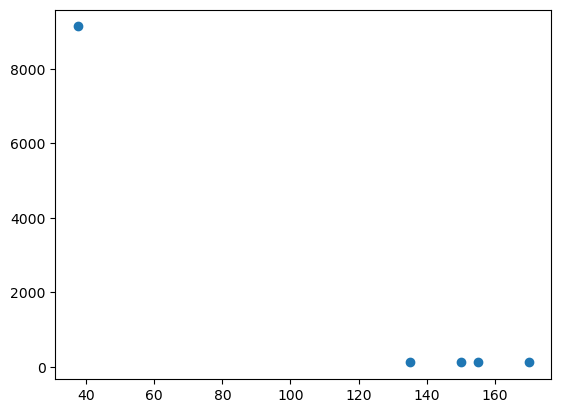

In [26]:
plt.scatter(angles_lab, diff_cross_section_lab)